In [40]:
# read in UK_flattened_output_big_eps.npy
import numpy as np
import matplotlib.pyplot as plt
import pickle
# UK specific soc jan31
# US specific soc jan31
results = np.load('UK_standard_jan31.npy', allow_pickle=True)
# results1 = np.load('US_specific_soc_jan31pt1.npy', allow_pickle=True)


Parameters used

In [41]:
epsilon = 0.01
infty = 10000000
state_values = np.arange(-2.8,2.8,0.28)
S = np.arange(0,20,1)
costs = np.arange(0,5,1)
possible_soc_terms = np.arange(0,5,1)
possible_inf_terms = np.arange(0,5,1)
theta_to_test = np.arange(0,20,2)

In [42]:
results = results.reshape(len(theta_to_test),len(theta_to_test),len(theta_to_test),len(possible_soc_terms),len(possible_inf_terms),len(costs),len(theta_to_test),len(theta_to_test),len(theta_to_test)).transpose(0,1,2,8,7,6,5,4,3)

In [43]:
#order is theta,theta,theta,theta,theta,theta,,costs,inf,soc

In [44]:
best_thetas = np.zeros((len(costs),len(possible_inf_terms),len(possible_soc_terms)),dtype=int)
for c in range(len(costs)):
    for inf in range(len(possible_inf_terms)):
        for soc in range(len(possible_soc_terms)):
            best_thetas[c,inf,soc] = np.argmax(results[:,:,:,:,:,:,c,inf,soc])
            print(costs[c],possible_inf_terms[inf],possible_soc_terms[soc],best_thetas[c,inf,soc],np.max(results[:,:,:,:,:,:,c,inf,soc]))



0 0 0 0 -2021.459
0 0 1 0 -2021.4589
0 0 2 0 -2021.459
0 0 3 0 -2021.459
0 0 4 0 -2021.459
0 1 0 402255 -1894.893
0 1 1 402255 -1891.2568
0 1 2 402255 -1891.1451
0 1 3 402255 -1892.5298
0 1 4 402255 -1895.0554
0 2 0 900241 -1972.1968
0 2 1 900241 -1971.009
0 2 2 900241 -1971.1255
0 2 3 900241 -1971.8711
0 2 4 900241 -1973.0547
0 3 0 900231 -1986.6406
0 3 1 900231 -1986.605
0 3 2 900231 -1987.0457
0 3 3 900231 -1987.6375
0 3 4 900231 -1988.3918
0 4 0 900231 -1992.786
0 4 1 900231 -1994.3579
0 4 2 231 -1995.8853
0 4 3 231 -1996.789
0 4 4 231 -1998.4021
1 0 0 0 -2021.4589
1 0 1 0 -2021.459
1 0 2 0 -2021.459
1 0 3 0 -2021.4589
1 0 4 0 -2021.459
1 1 0 402255 -1888.0813
1 1 1 402255 -1888.3857
1 1 2 402255 -1888.4246
1 1 3 402255 -1888.0645
1 1 4 402255 -1888.4524
1 2 0 900241 -1972.6578
1 2 1 900241 -1971.448
1 2 2 900241 -1971.4868
1 2 3 900241 -1972.1179
1 2 4 900241 -1973.1501
1 3 0 900231 -1987.5667
1 3 1 900231 -1987.5281
1 3 2 900231 -1987.9575
1 3 3 900231 -1988.5327
1 3 4 900231 -19

In [45]:
UK_standard = best_thetas

In [46]:
# # print unique elements of US_standard
# US_thetas = np.unique(US_standard)
# US_theta_bests = [(results.flatten()[index*125:(index+1)*125]) for index in US_thetas]

In [50]:
# print unique elements of US_standard
UK_thetas = np.unique(UK_standard) # these are the thetas we should analyze
UK_theta_bests = [results.flatten()[index*125:(index+1)*125] for index in UK_thetas]

In [62]:
print(UK_thetas)
print(US_thetas)

[     0    231 402255 602266 900221 900231 900241 900255 902255 999255]
[     0   1010 201010 211111 301010 303335 655555 755555 898888 899898]


In [59]:
for best_theta in UK_theta_bests:
    flat_index = np.argmax(best_theta)
    print(np.max(best_theta),int(flat_index/25),int((flat_index%25)/5),int(flat_index%5))

-2021.4589 0 0 1
-1983.3206 0 1 4
-1888.0645 1 1 3
-1909.6449 3 1 4
-1993.2546 2 1 4
-1976.2407 2 1 4
-1953.7334 2 1 4
-1906.8612 2 1 4
-1901.603 1 1 2
-1916.6465 3 1 3


In [99]:
for i in range(len(UK_theta_bests)):
    UK_theta_bests[i] = UK_theta_bests[i].reshape(5,5,5) # should be costs, inf, soc

In [89]:
def convert_to_thetas(theta_index):
    theta_index = (int(theta_index*10**-5),int((theta_index%10**5)*10**-4),int((theta_index%10**4)*10**-3),int((theta_index%10**3)*10**-2),int((theta_index%10**2)*10**-1),int(theta_index%10))
    return tuple(float(round(state_values[2*theta],3) )for theta in theta_index)

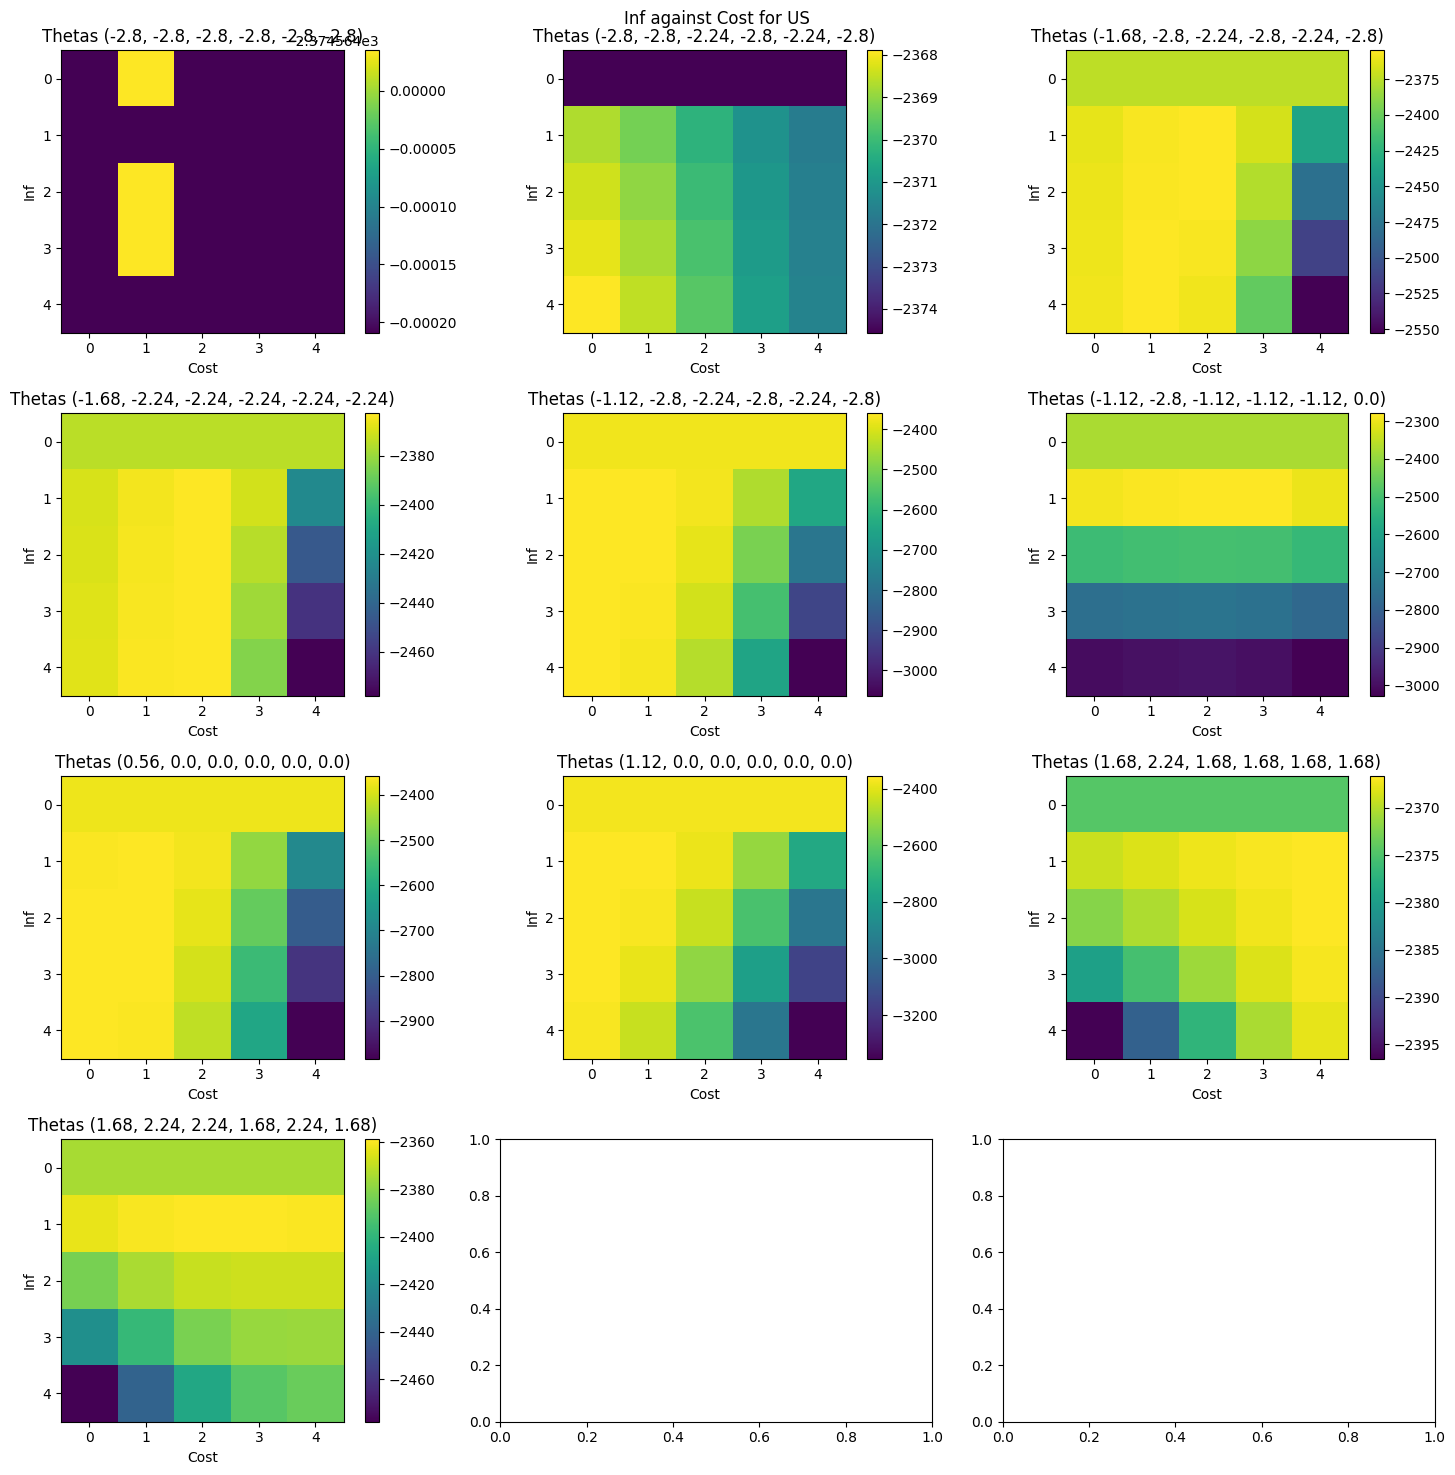

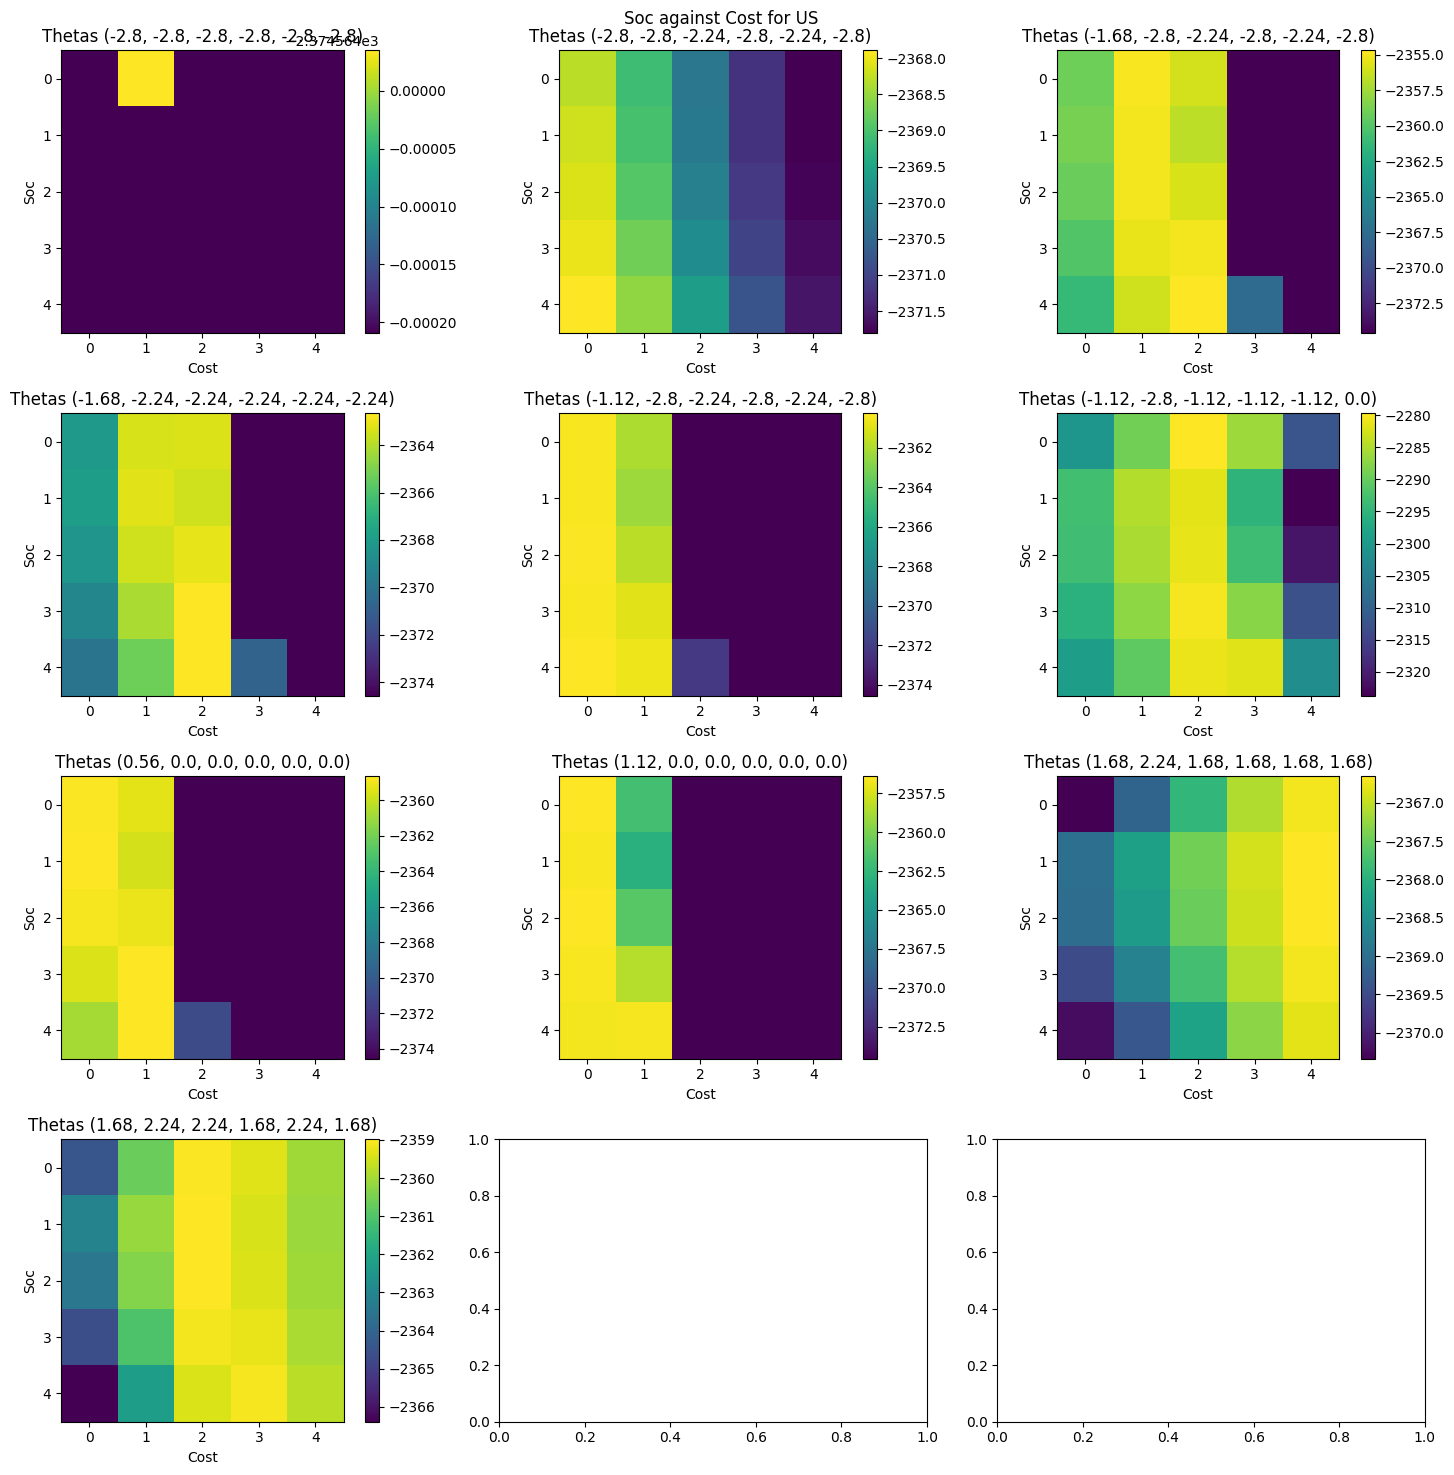

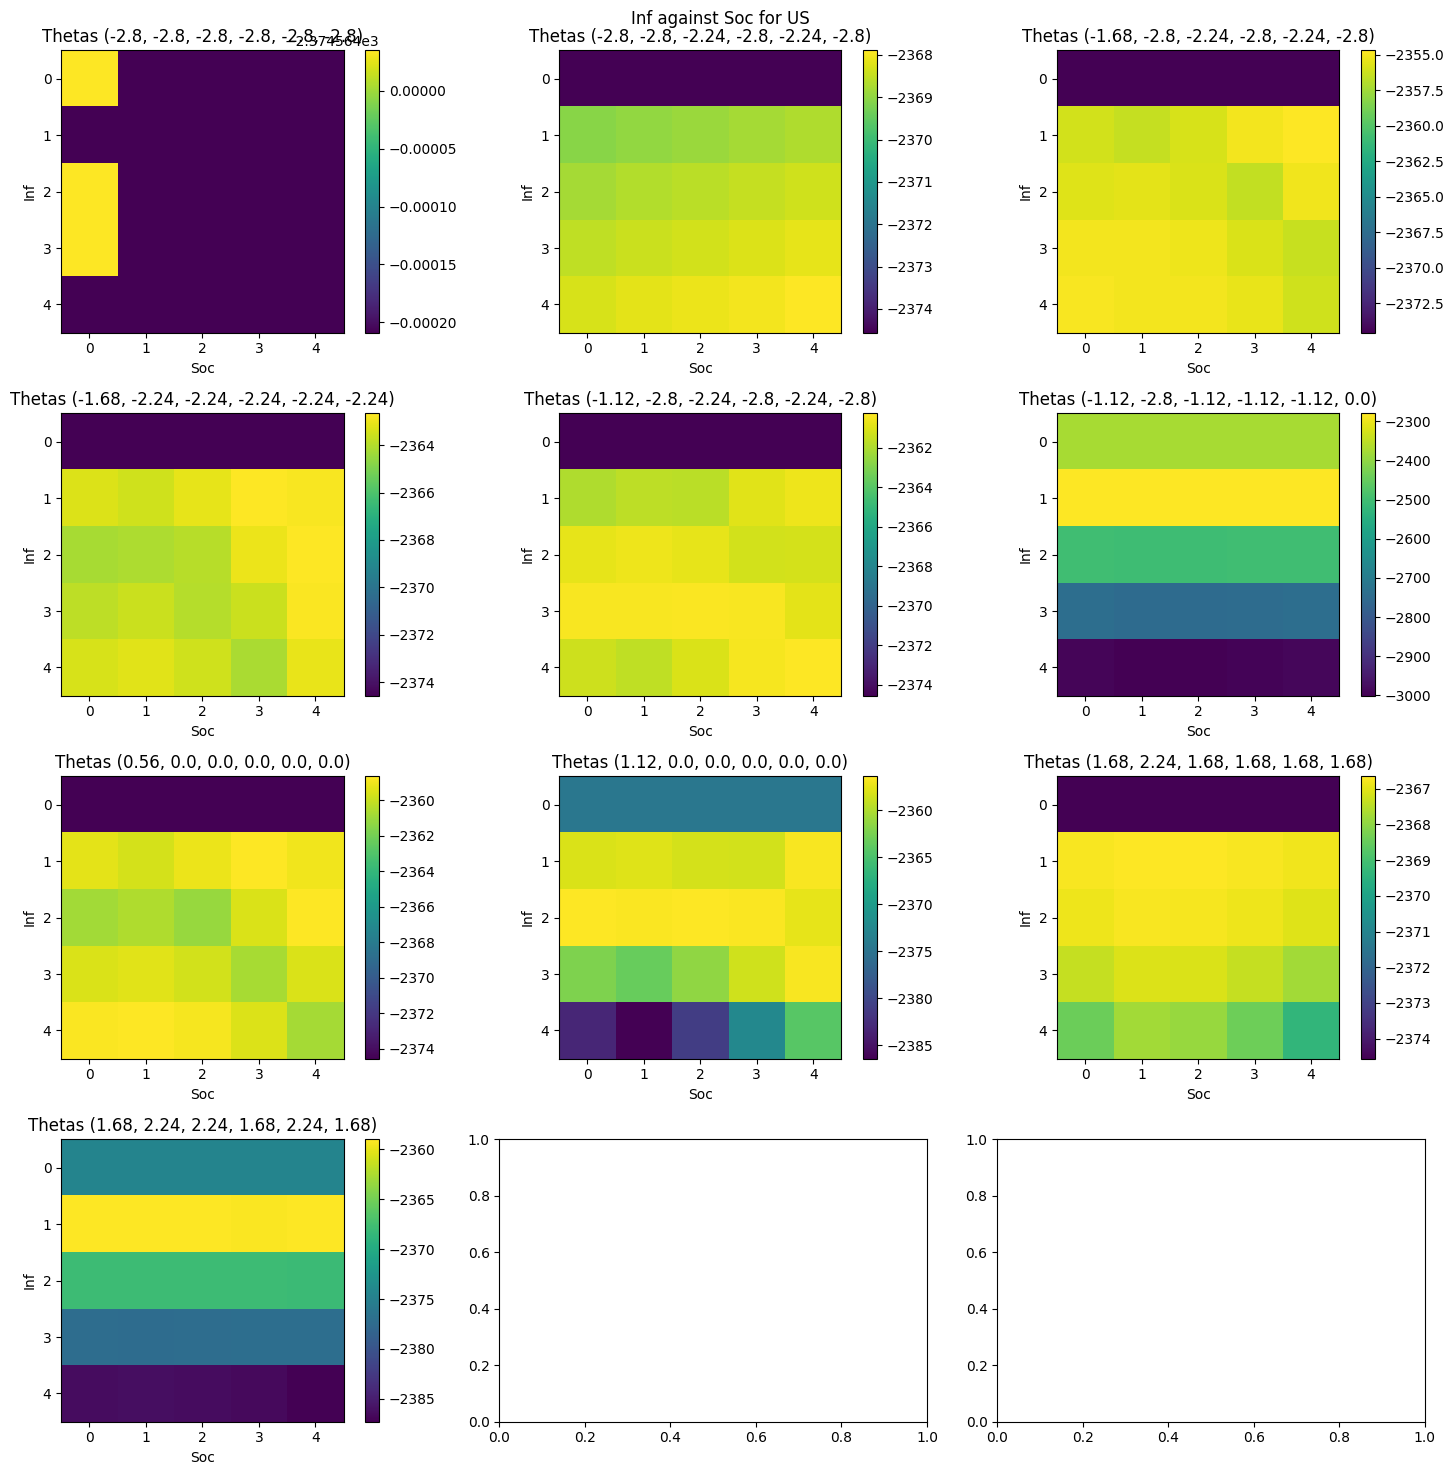

In [103]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

for i, theta_best in enumerate(US_theta_bests):
    grid = np.zeros((5, 5))
    for cost in range(len(costs)):
        for inf in range(len(possible_inf_terms)):
            grid[inf, cost] = np.max(theta_best[cost,inf,:])
    ax = axes[i]
    im = ax.imshow(grid, cmap='viridis')
    # label x and y axes
    ax.set_xlabel('Cost')
    ax.set_ylabel('Inf')
    ax.set_title(f'Thetas {convert_to_thetas(US_thetas[i])}')
    fig.colorbar(im, ax=ax)
plt.suptitle('Inf against Cost for US')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

for i, theta_best in enumerate(US_theta_bests):
    grid = np.zeros((5, 5))
    for cost in range(len(costs)):
        for soc in range(len(possible_soc_terms)):
            grid[soc, cost] = np.max(theta_best[cost,:,soc])
    ax = axes[i]
    im = ax.imshow(grid, cmap='viridis')
    # label x and y axes
    ax.set_xlabel('Cost')
    ax.set_ylabel('Soc')
    ax.set_title(f'Thetas {convert_to_thetas(US_thetas[i])}')
    fig.colorbar(im, ax=ax)
plt.suptitle('Soc against Cost for US')
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, theta_best in enumerate(US_theta_bests):
    grid = np.zeros((5, 5))
    for inf in range(len(costs)):
        for soc in range(len(possible_soc_terms)):
            grid[inf,soc] = np.max(theta_best[:,inf,soc])
    ax = axes[i]
    im = ax.imshow(grid, cmap='viridis')
    # label x and y axes
    ax.set_xlabel('Soc')
    ax.set_ylabel('Inf')
    ax.set_title(f'Thetas {convert_to_thetas(US_thetas[i])}')
    fig.colorbar(im, ax=ax)
plt.suptitle('Inf against Soc for US')
plt.tight_layout()
plt.show()

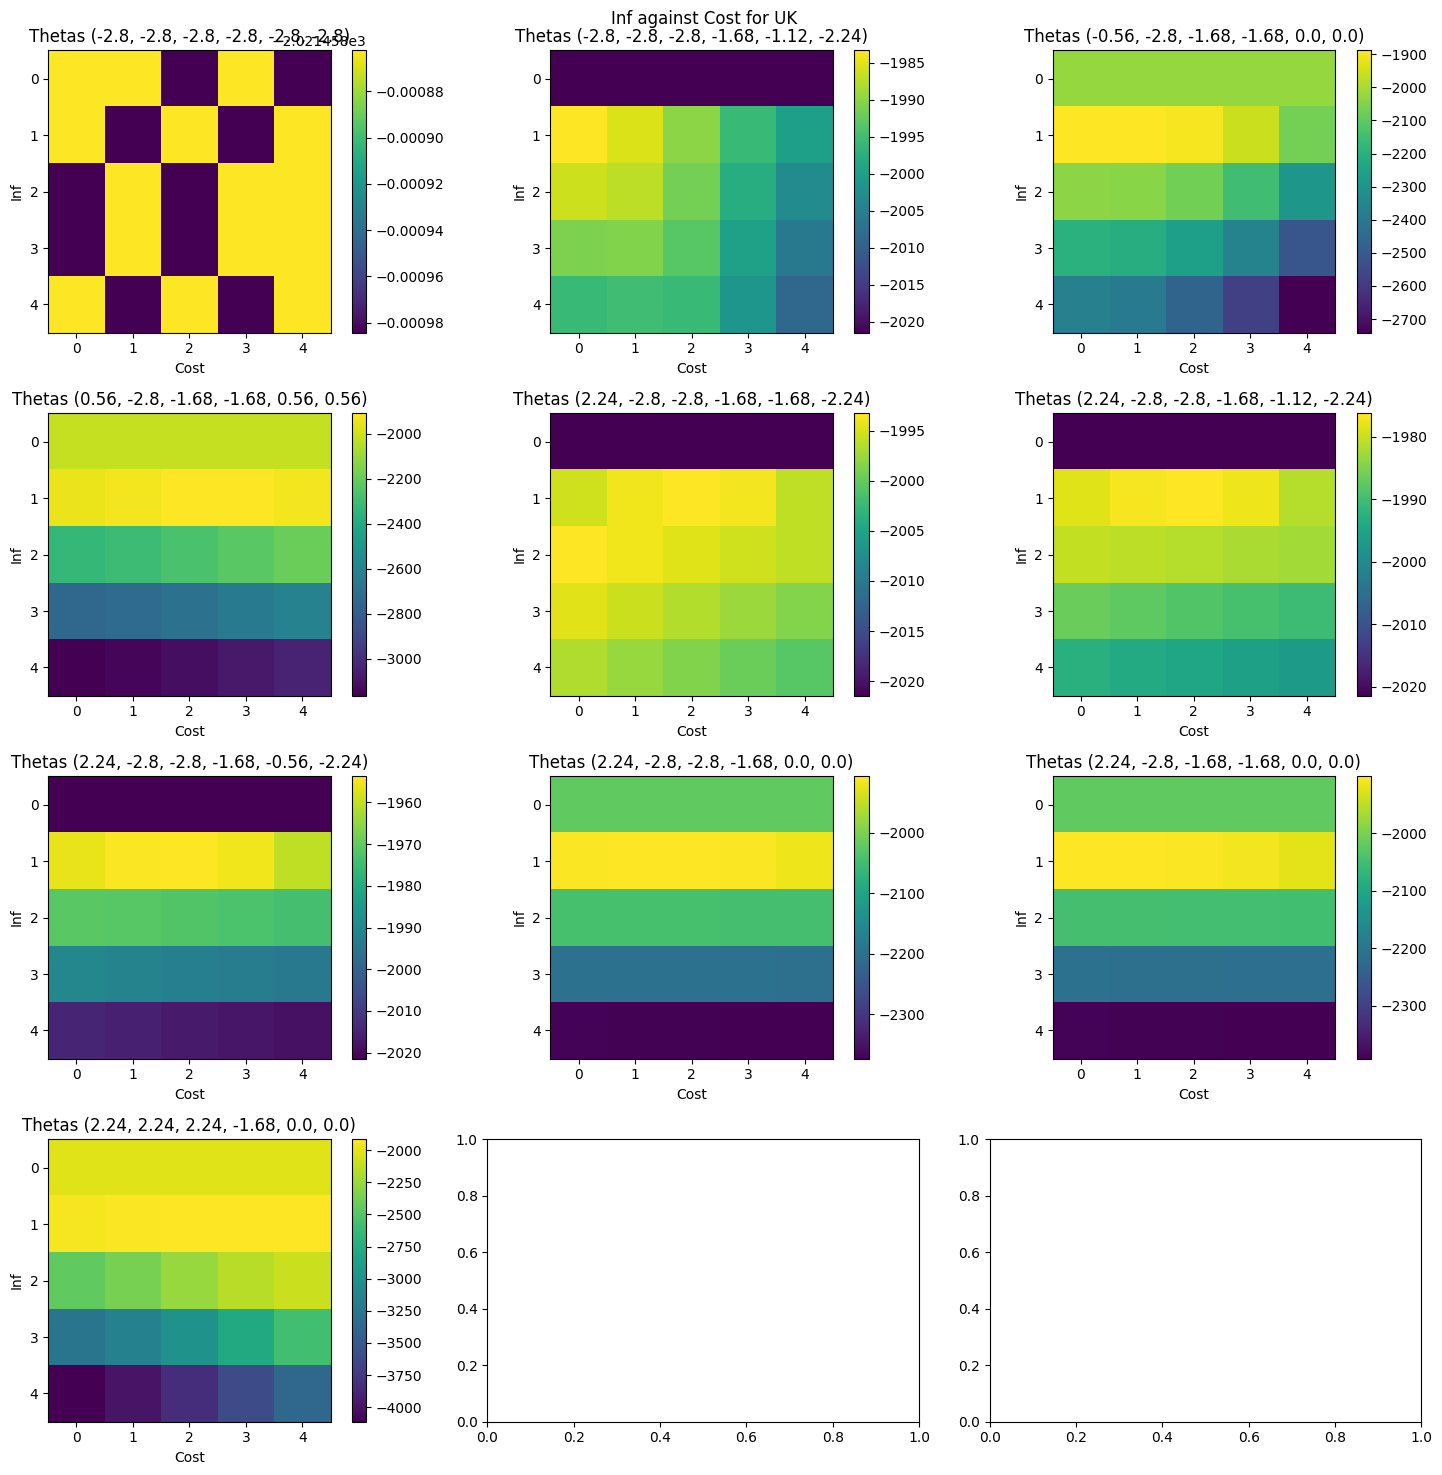

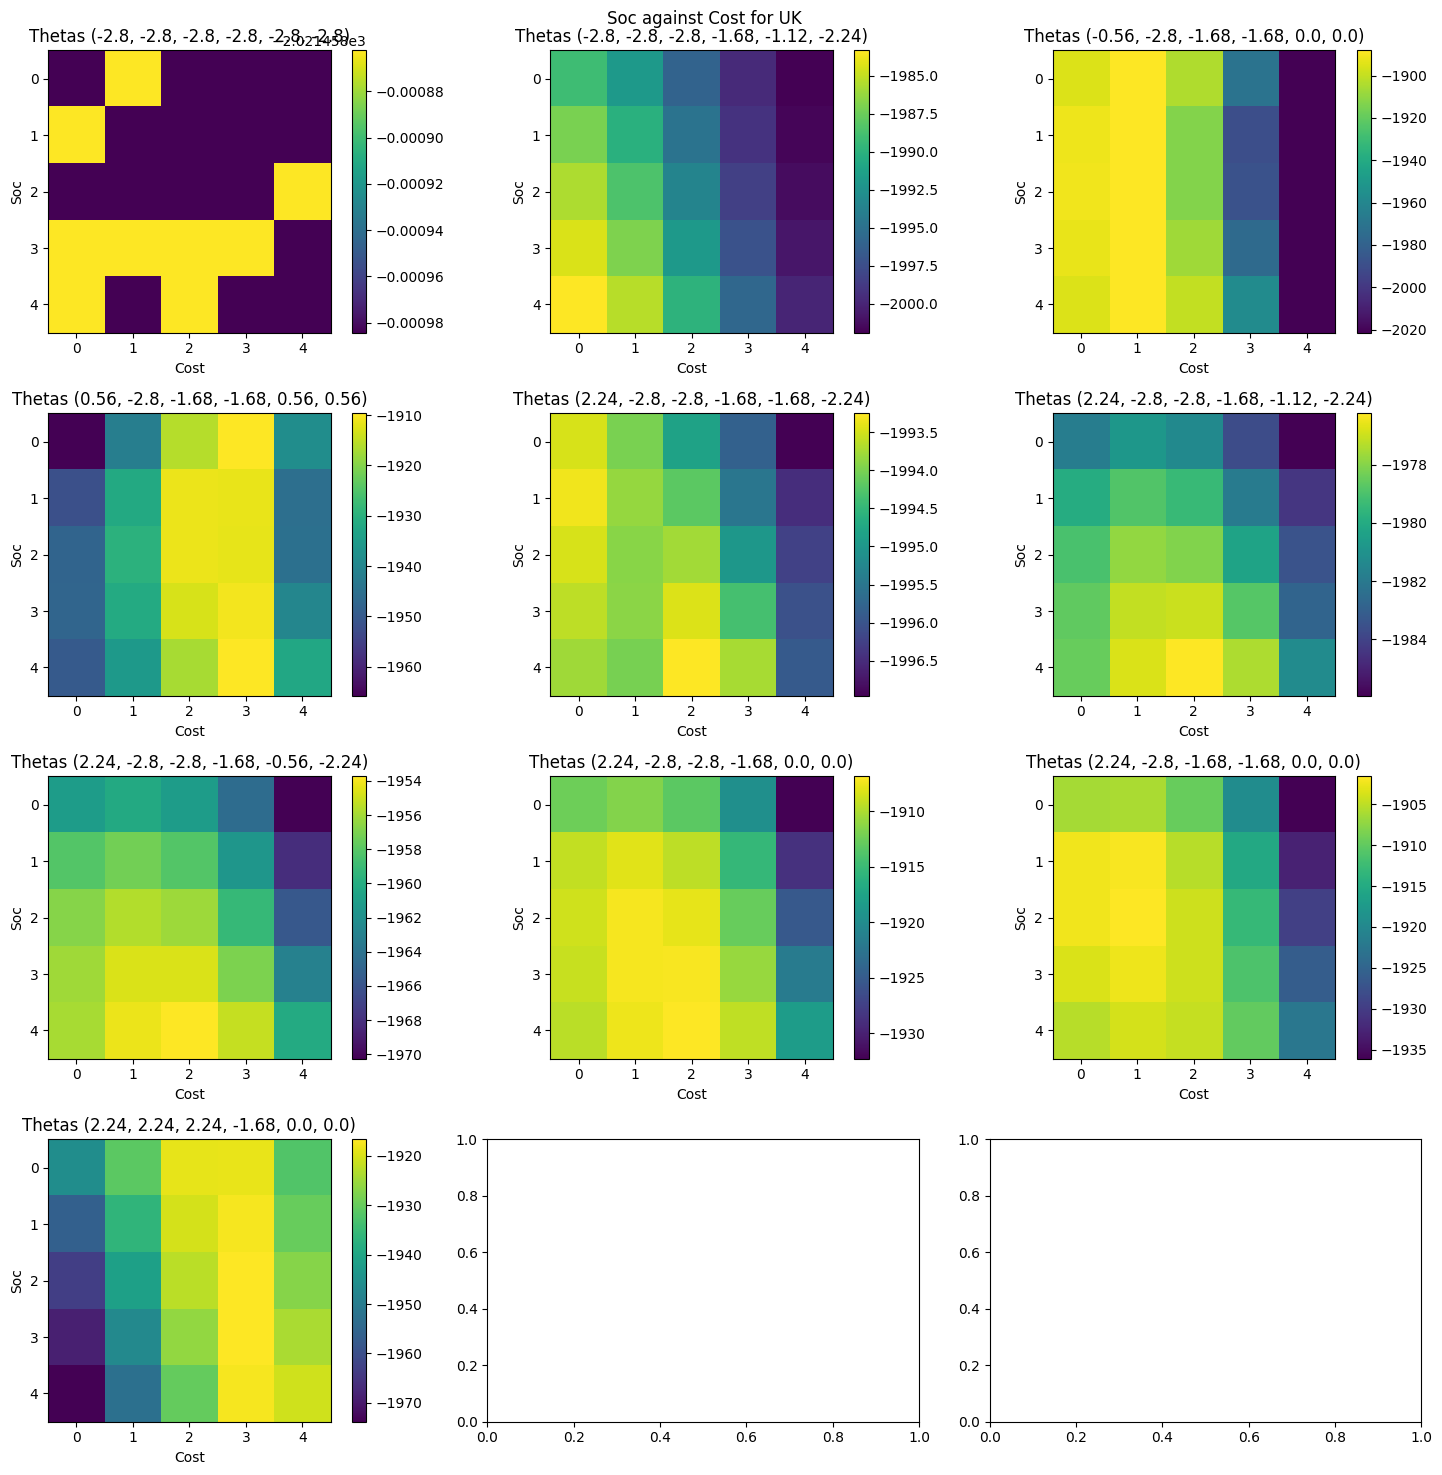

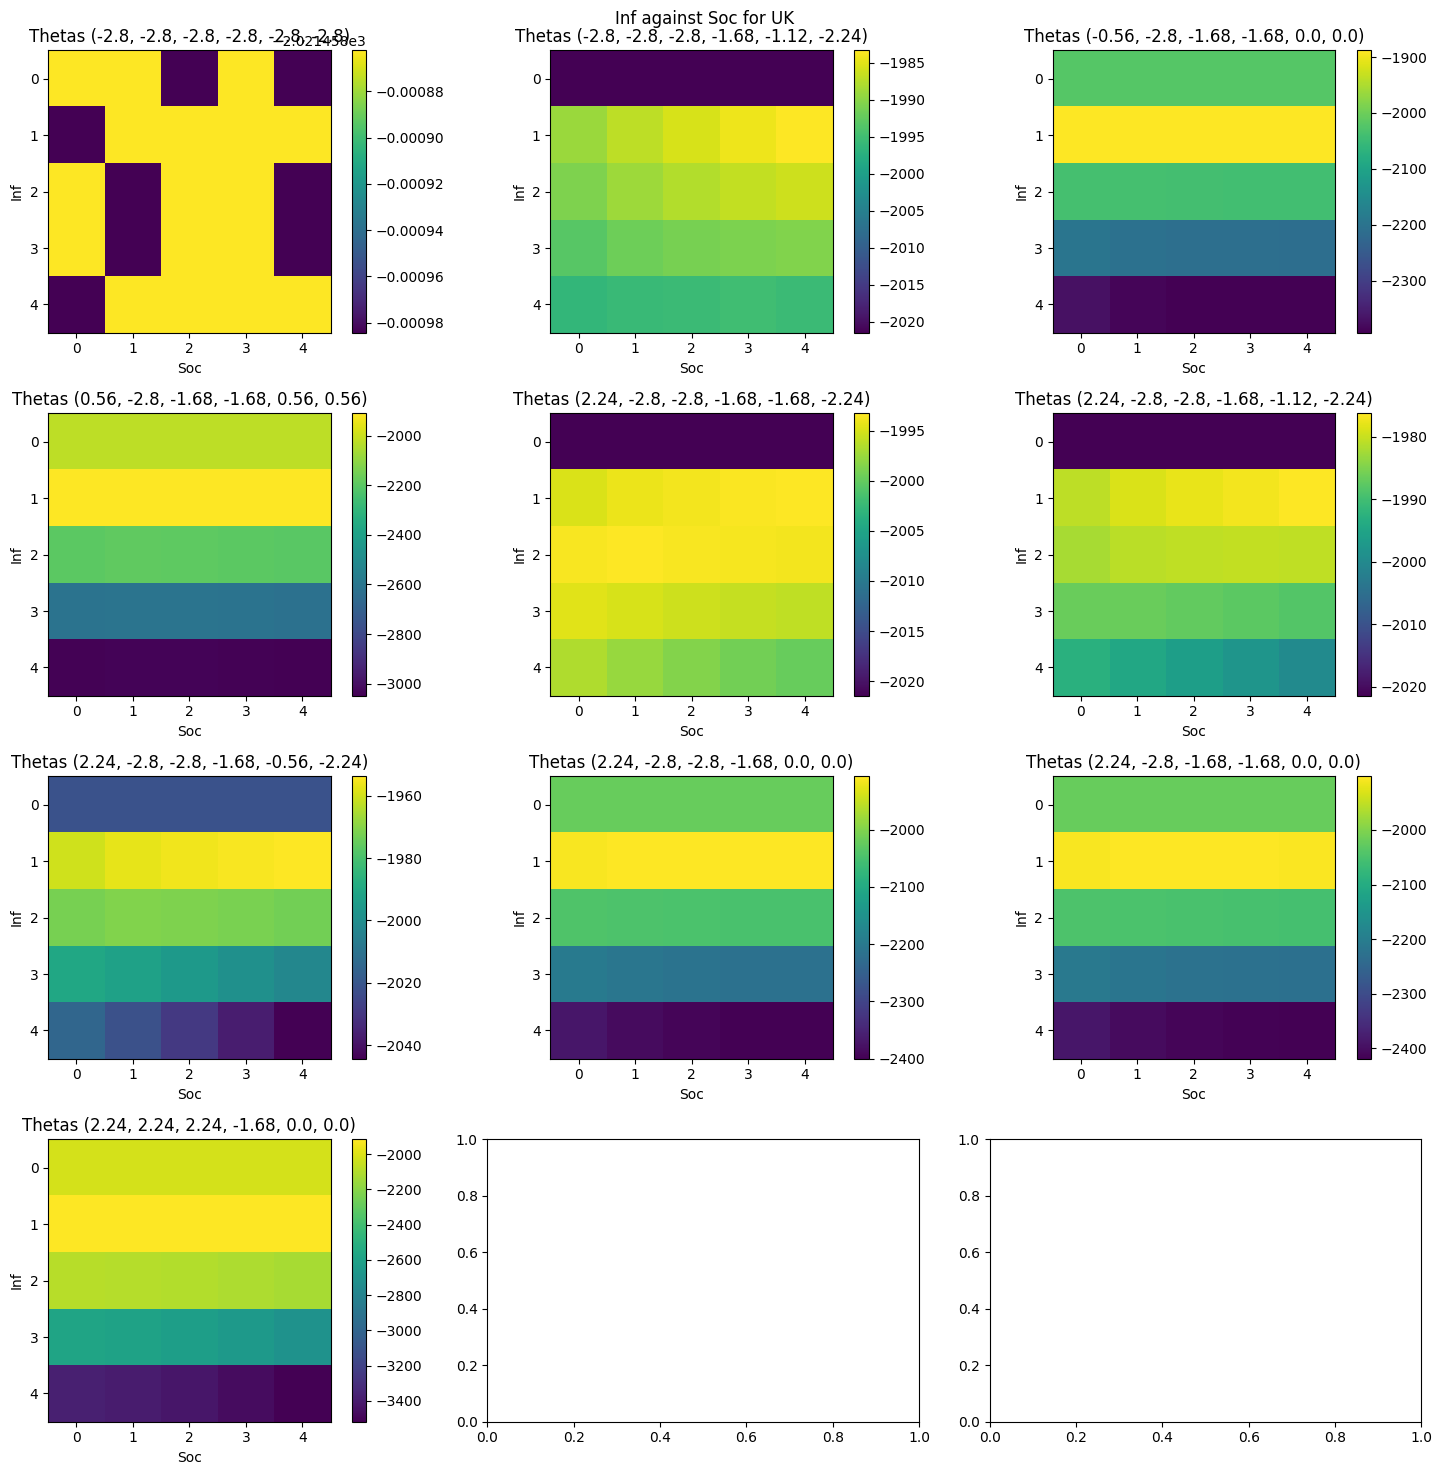

In [104]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

for i, theta_best in enumerate(UK_theta_bests):
    grid = np.zeros((5, 5))
    for cost in range(len(costs)):
        for inf in range(len(possible_inf_terms)):
            grid[inf, cost] = np.max(theta_best[cost,inf,:])
    ax = axes[i]
    im = ax.imshow(grid, cmap='viridis')
    # label x and y axes
    ax.set_xlabel('Cost')
    ax.set_ylabel('Inf')
    ax.set_title(f'Thetas {convert_to_thetas(UK_thetas[i])}')
    fig.colorbar(im, ax=ax)
plt.suptitle('Inf against Cost for UK')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()

for i, theta_best in enumerate(UK_theta_bests):
    grid = np.zeros((5, 5))
    for cost in range(len(costs)):
        for soc in range(len(possible_soc_terms)):
            grid[soc, cost] = np.max(theta_best[cost,:,soc])
    ax = axes[i]
    im = ax.imshow(grid, cmap='viridis')
    # label x and y axes
    ax.set_xlabel('Cost')
    ax.set_ylabel('Soc')
    ax.set_title(f'Thetas {convert_to_thetas(UK_thetas[i])}')
    fig.colorbar(im, ax=ax)
plt.suptitle('Soc against Cost for UK')
plt.tight_layout()
plt.show()
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
axes = axes.flatten()
for i, theta_best in enumerate(UK_theta_bests):
    grid = np.zeros((5, 5))
    for inf in range(len(costs)):
        for soc in range(len(possible_soc_terms)):
            grid[inf,soc] = np.max(theta_best[:,inf,soc])
    ax = axes[i]
    im = ax.imshow(grid, cmap='viridis')
    # label x and y axes
    ax.set_xlabel('Soc')
    ax.set_ylabel('Inf')
    ax.set_title(f'Thetas {convert_to_thetas(UK_thetas[i])}')
    fig.colorbar(im, ax=ax)
plt.suptitle('Inf against Soc for UK')
plt.tight_layout()
plt.show()

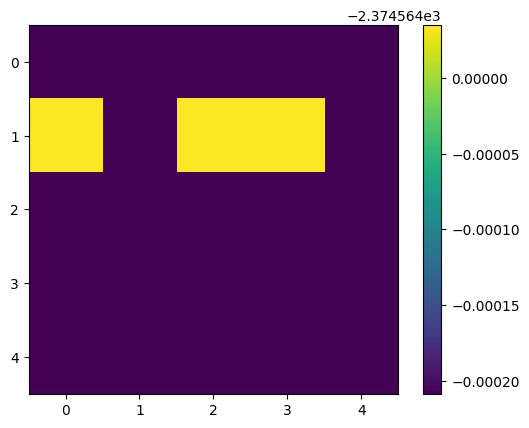

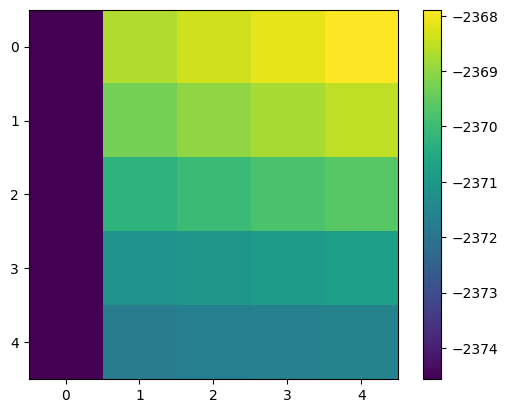

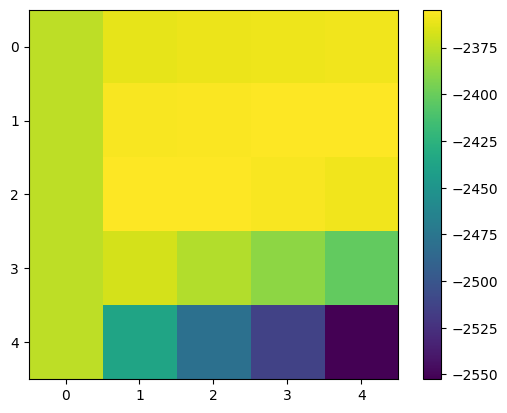

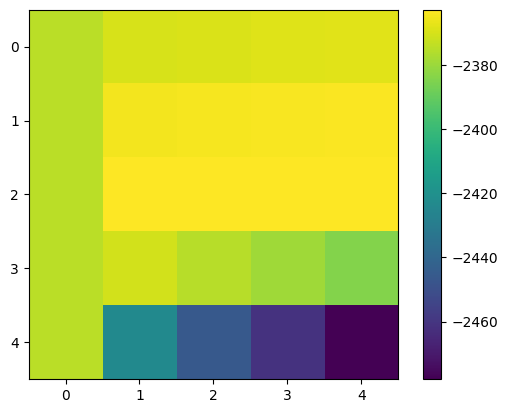

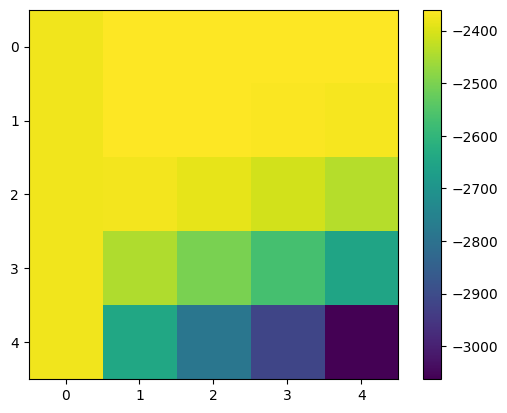

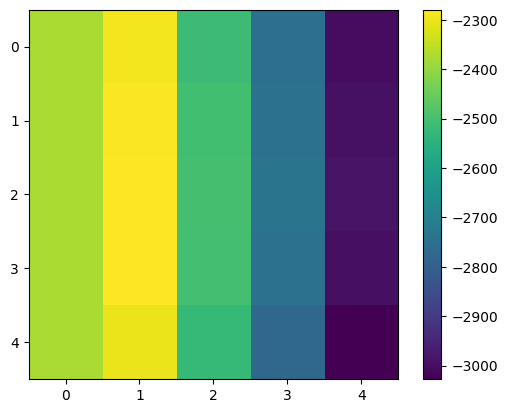

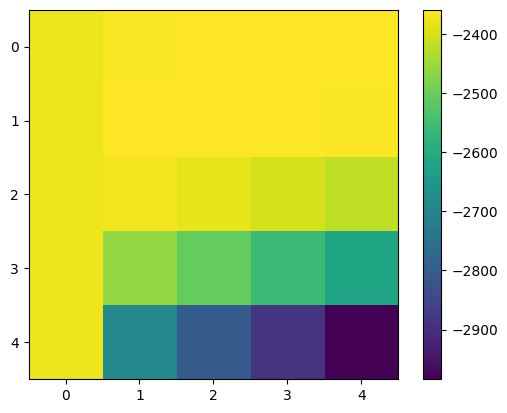

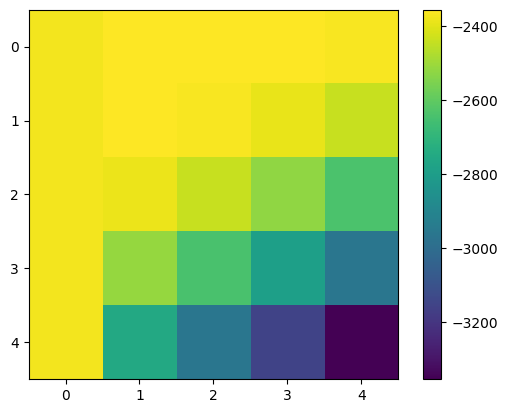

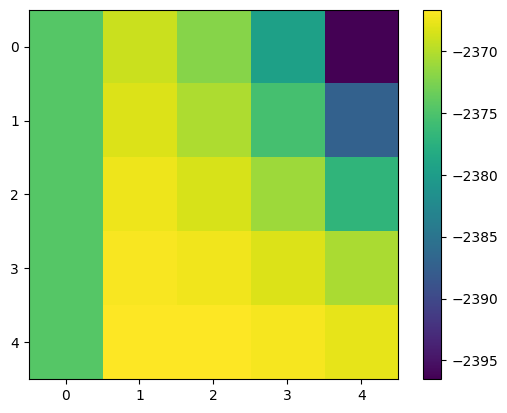

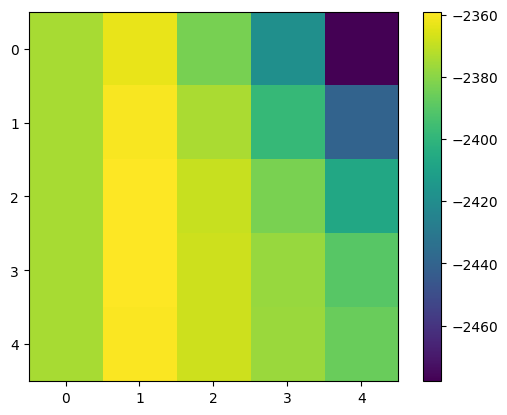

In [ ]:
# plot subplots of grids in 4 by 3 grid
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
for theta_best in US_theta_bests:
    grid = np.zeros((5,5))
    for cost in range(len(costs)):
        for inf in range(len(possible_inf_terms)):
            grid[cost,inf] = np.max(theta_best[cost,inf,:])
    plt.imshow(grid)
    plt.title(f'US Standard {}')
    # show label
    plt.colorbar()
    plt.show()

In [60]:
for best_theta in US_theta_bests:
    flat_index = np.argmax(best_theta)
    print(np.max(best_theta),int(flat_index/25),int((flat_index%25)/5),int(flat_index%5))

-2374.564 1 0 0
-2367.8916 0 4 4
-2354.6848 2 1 4
-2362.662 2 2 4
-2360.2664 0 4 4
-2279.6848 2 1 0
-2358.648 1 1 3
-2356.405 0 2 2
-2366.652 4 1 1
-2358.9834 2 1 1


In [54]:
# best coordinate for UK is 4,0,2,2,5,5,1,1,3
# best coordinate for US is 3,0,3,3,3,5,2,1,0

array([     0,    231, 402255, 602266, 900221, 900231, 900241, 900255,
       902255, 999255])